
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Banner_IA2_1.png" style="width:1500px;heigth:100px">



# <center> 01. Fundamentals of Machine Learning: towards gradient descent </center>



## <span style="color:red"> Outline </span> 

0. **Machine Learning "re"-introduction**
1. **Regression from scratch: a linear approximation**
3. **Gradient descent method: An Iterative approach**




In [ ]:
#@title 1. MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA2/ai-2-uis-student')
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/course-IA2/ai-2-uis-student


# Machine Learning

How to go from here (sci-fi) to here (fundamentals on IA) **without lost motivation** ??


<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/img1.png" width="700"></center>

## "A computer learns from experience **E** (training data) with respect to some task **T** (classification/regression) and some performance measure **P** (accuracy, RoC), if its performance on **T**, as measured by **P**, improves with experience **E**." (*modified from* Mitchell, 1998)



# Supervised Learning

The idea is to adjust a  function from **labeled training data** and try to associate a **label** (predict/estimate/reconstruct/measure ) to a new data.

<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/img2.png" width="700"></center>

Formally, we have input variables (x) and an output variable (y) and we will use/develop/modify/propose an algorithm to learn the mapping function from the input to the output. 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

**We will see with an example:**


- Load (with Pandas) the dataset [**Beijing PM2.5**](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data)  *Liang, X. et al. (2015). Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society A, 471, 20150257.*

- What about this **Dataset** ?

- Plot  **Temperature** vs **pression**

- We want to predict **Temperature** value from **pression** variable. What would you do?

- What about **pollution (PM2.5)** vs **Temperature**?


In [ ]:
#@title **code student**
# wirte code Here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




The idea is then **estimate** a **Temp** value (real value) from the **Pressure feature**. This is named **REGRESSION!**

# **1. Regression from scratch: a linear approximation**

- In this supervised problem, it should be predicted a **continuous value** based on a set of **training data**. 
- Then, we need to fit a function $f(x)$ to represent the regresion from training data $\mathbf{X}$
  - **Fit** means find the **best** parameters that adjust the function $f(x) = \{\omega_1, \omega_2, \ldots, \omega_n\}$

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


- Which is the **simplest** function to fit training data ?
- Which are the parameters for the **simplest** function ?
- In our particular case, which input/output variables ?
- How many trainig values ($\mathbf{X}$) we have?





In [ ]:
#@title **code student** 
# Answer here 



Text(0, 0.5, 'Temperature (T)')

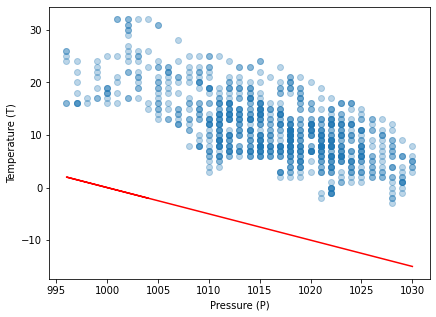

In [ ]:
#@title  **How to define best parameters ?**
beta_0 = 500 #@param {type:"number"}
beta_1 = -0.5#@param {type:"number"}
 
data = pd.read_csv('data/PRSA_data_class_1.csv',error_bad_lines=False)
X = data[[x_1, x_2]].values[init_data:end_data,:]

y_est=beta_0 +beta_1*X[:, 0]

fig = plt.figure(figsize=(15,5))
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
# plot a scatters points

ax.scatter(X[:, 0], Y, alpha=0.3)
ax.plot(X[:, 0] , y_est, c="red")
ax.set_xlabel('Pressure (P)')
ax.set_ylabel('Temperature (T)')



- How to define **best** parameters ?
  - We need to evaluate the function $f_{\omega}(x) = \{\omega_0,\omega_1, \ldots \}$ that minimize **the error**, so: 

  - we assume that regression could be represented by $f_{\omega}(x) = \omega_0 +\omega_1 x$
  
  - the parameters to **LEARN** are $\{\omega_0,\omega_1\}$

  - the cost function is the error $ J(\omega) = F_{\omega}(x) - \mathbf{X}$

  - ###### **GOAL is TO MINIMIZE ($J(\omega)$): $\underset{\omega_0, \omega_1}{min} (E)$**  


#### **Last squares**

<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/mse_grafica.png" width="300"></center>



Then, the goal is to define an error function that can be expressed mathematically as  the **mean square error (MSE)**  as: 

$$J(\omega) = \frac{1}{n}\sum_{i}^{n}( y^{i} -\hat{y}_{\omega}(x^{i}) )^{2}$$

where $\hat{y}_{\omega}(x^{i})$ is prediction on $x^{i}$ point with parameters $\omega$ and the  $y^{i}$ the corresponding training value ($x^{i}, y^{i} $) and the linear model is: $\hat{y}_{\omega}(x^{i}) = \omega_0 + \omega_1 x^{i}$. The simplest way to solve this problem come  from **closed solutions**. From matricial notation, the cost function, can be defined as: 

$$J(\omega) = (Y-XW)^T (Y-XW)$$

we can derivate (error == 0), to minimize function, as 

1. Expanding: $Y^T Y - W^T X^T Y - Y^T XW + W^T X^T XW$
2. Re-writting $-2X^T Y+2X^T XW=0$
3. Normal equation: $(X^TX)W = X^TY$ 
4. Solve for: $B = (X^TX)^{-1} X^T Y$
5. **Make predictions:** $\hat{Y} = XW$ 


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Now, you can the opportunity to implement this **close solution** for the dataset [**Beijing PM2.5**](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data)

- $(\mathbf{\hat{Y}})$ is the Temperature
- $(\mathbf{\hat{X}})$ is the Pression


0. Load dataset, show in a header and get $(\mathbf{X}, \mathbf{Y})$



In [ ]:
#@title Dataframe Beijin PM2.5
# select variable of interest and reshape for matrix operation
X = data['PRES'].values[2000:3000]
# select variable to predict
Y = data['TEMP'].values[2000:3000]

print("X: ", X.shape, "Y: ", Y.shape)
print(data.shape)
data.head()

X:  (1000,) Y:  (1000,)
(43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


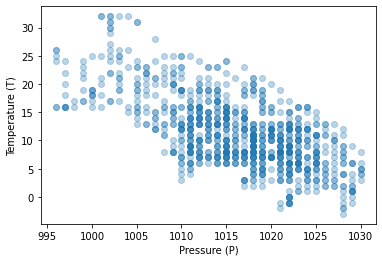

In [ ]:
#@title Plot (X,Y)
plt.scatter(X,Y, alpha = 0.3);
plt.xlabel('Pressure (P)');
plt.ylabel('Temperature (T)');

Arrange $\mathbf{X}$ by adding a ones column ($x_0$) that support $\omega_0$ operation

In [ ]:
#@title **code student**


(1000, 3)

Compute $W = (X^TX)^{-1} X^T Y$ using matricial numpy operations

In [ ]:
#@title **code student**



Compute $\hat{Y} = XW$ 

In [ ]:
#@title **code student**



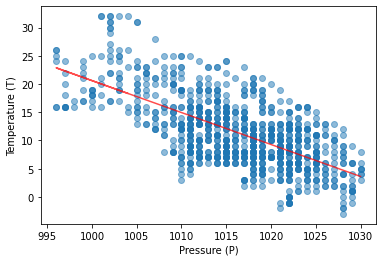

In [ ]:
#@title Plot close solution
plt.scatter(X_ad[:,1],Y, alpha=0.5);
plt.plot(X_ad[:,1],predictedY, 'red', alpha=0.7);
plt.xlabel('Pressure (P)');
plt.ylabel('Temperature (T)');

**In summary**, linear regression assumes between a dependent variable ($y$) and independent variables ($x$). For a sigle input variable  ($x_1$), while for multiple input variables is a  **multiple linear regression** (until $x_i$), described as: 

$$y = \omega_0 + \omega_1 x_1 + \dots + \omega_i x_i + \epsilon$$

Where  $\omega_1$ is scale factor and $\omega_0$  indicates the intercept. Also, the $\epsilon$ parameter indicates the error (namely assumed as Gaussian distribution $(G(\mu=0, \sigma=1)$). The following graphs show the relationship of temperature to pressure and rainfall accumulated in Beijing.

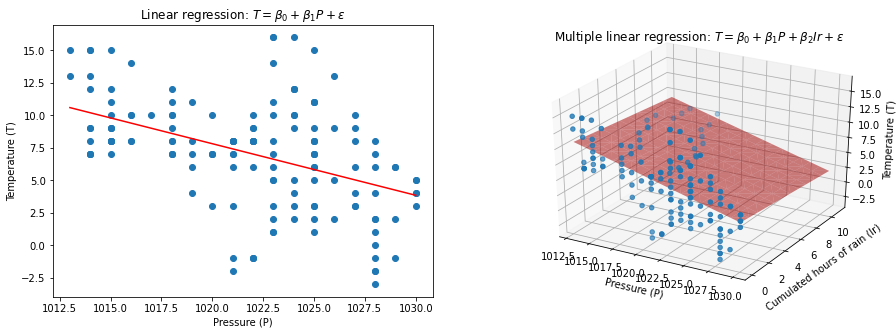

In [ ]:
#@title **Linear regression plots** { display-mode: "form" }
%run -i 'code/plot_class_1_1.py'

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Run a regression example using **BOSTON DATASET**`from sklearn.datasets import load_boston`. y = target and X= 5 feature and with any other

- What happened with multivariable problems? It is fast or slow?

# Some partial Conclusions!
This type of solution has strong limitations such as: 
* High complexity in environments with large amounts of observations. 
* Restrictions on the calculation of the inverse matrix (singularity)

***What happens when it is not possible to solve the problem with closed formulation?***

# **3. Gradient descent method: An Iterative approach**


# $$\omega := \omega - \alpha\nabla J(\omega)$$


### **Gradient Descent is the process of minimizing a cost function by following  gradient steps along the cost $J$ function**


<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/gradientdescent_intuition.gif" width="400"></center>

- We need to know the derivative of cost function (step of algorithm)
- The estimation moves in "direction of gradient"
- $\omega$ calues are updated, minimizing the error (loss) of a model on our training data, according to: 

$$\omega := \omega - \alpha\nabla J(\omega)$$

- 

The parameter $\alpha$ is the **learning rate** (step-size). The influence of  $\alpha$ is illustrated in next picture: 

<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/gradientdescent.gif" width="500"></center>

So, the method can be summarized in the following steps:

**Gradient descent method:**
1. Initialize the coefficients $\omega$
2. Calculating the gradient $\nabla J(\omega)$
3. Updating the coefficients $\omega_{t} := \omega_{t-1} - \alpha\nabla J(\omega_{t-1})$
4. Calculate error tolerance to stop the algorithm $e = \omega_{t}-\omega_{t-1} > tolerance$

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Now that you know $J(\omega)$ and $\nabla J(\omega)$ **implement gradient descent using loops for training samples**
- Drawn resulting line and minimization function


1. Define cost function: $J(\beta) = \frac{1}{n}\sum_{i}^{n}( y^{i} -\hat{y}_{\omega}(x^{i}) )^{2}$



In [ ]:
#@title **code student** 
#@markdown point wise cost_fun_ew
def cost_fun_ew(beta_0, beta_1, X, Y):
    

    
    return J
  
  
  return J
print(cost_fun_mat(np.array([0, 1]), np.ones(X.shape), np.ones(X.shape)))
print(cost_fun_mat(np.array([0, 0.5]), np.ones(X.shape), np.ones(X.shape)))

0.0
0.125


2. Define gradient of cost function: $\nabla J(\omega)$


In [ ]:
#@title **code student** 
def cost_grad_ew(beta_0, beta_1, X, Y):
  
  return b_0_dev, b_1_dev




0.0
(-0.0005, -0.0005)


3. Implement gradient descent approach: $\omega := \omega - \alpha\nabla J(\omega)$ from a element-wise perspective


In [ ]:
#@title **code student** def descenso_gradiente

def grad_des_ew(X, Y, beta_0, beta_1, alpha, batch):
    hist_coste = []
    for i in range(batch):
      
      
      
      if (cost_i-cost_ip) < 1e-08 :
        print("batch_i: ", i, "tolerance is satisfied: ", cost_i-cost_ip, "cost: ", cost_ip)
        break
     

    print("batch: ", i, "cost: ", cost_fun_ew(beta_0, beta_1, X, Y))
    return beta_0, beta_1, hist_coste
  

1000
41.82516304332558


(98.90691010348286, -0.09307896561839411)

- Use the artifitial dataset `make_regression` to test your code. 

In [ ]:
#@title **code student**
#@markdown Plot from `sklearn: make_regression`

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, Y ...



beta_0,beta_1, hist_coste = grad_des_ew(X, Y, 1.0, 1, 0.01, 500)
print("beta_0: ", beta_0, " beta_1: ", beta_1)
y_est=beta_0 +beta_1*X
print(y_est.shape, X.shape)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X, Y, alpha=0.3)
ax.plot(X , y_est, c="red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(len(hist_coste)) , hist_coste, c="red")


- Evaluate the implementation on the dataset [**Beijing PM2.5**](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data)

  - $(\mathbf{\hat{Y}})$ is the Temperature
  - $(\mathbf{\hat{X}})$ is the Pression

In [ ]:
#@title Dataframe Beijin PM2.5
# select variable of interest and reshape for matrix operation
import pandas as pd
import numpy as np
data = pd.read_csv('data/PRSA_data_class_1.csv',error_bad_lines=False)

...
print("X: ", X.shape, "Y: ", Y.shape)
print(data.shape)
data[2000:3000].head()

X:  (1000,) Y:  (1000,)
(43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
2000,2001,2010,3,25,8,12.0,-16,3.0,1030.0,NW,21.01,0,0
2001,2002,2010,3,25,9,10.0,-15,4.0,1030.0,NW,28.16,0,0
2002,2003,2010,3,25,10,9.0,-17,5.0,1030.0,NW,37.99,0,0
2003,2004,2010,3,25,11,12.0,-20,6.0,1029.0,NW,46.93,0,0
2004,2005,2010,3,25,12,12.0,-20,7.0,1028.0,NW,51.85,0,0


(1000,) (1000,)


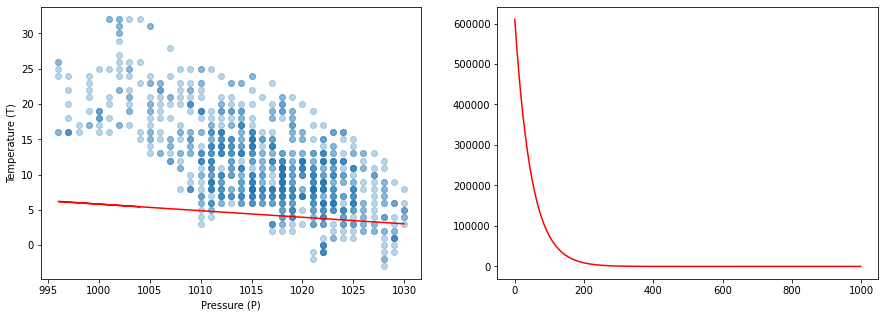

In [ ]:
import matplotlib.pyplot as plt



y_est=beta_0 +beta_1*X
print(y_est.shape, X.shape)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X, Y, alpha=0.3)
ax.plot(X , y_est, c="red")
ax.set_xlabel('Pressure (P)')
ax.set_ylabel('Temperature (T)')
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(len(hist_coste)) , hist_coste, c="red")

# **Conclusions**

- In a **CLOSE SOLUTION** is not necesary to iterate 
- **BUT** need to compute $(X^{T}X)^{-1}$ that is $O(n^3)$
- It is **very SLOW** if **N** is  **LARGE**

- Gradient descent need to choose $\alpha$
- Need many iterations
- Works well when **N** is **LARGE**


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


- What about matricial operation? Implement the gradient descent version using matricial app


- Compare time responses


# **References**

[1. Introduction to Deep Learning From Logical Calculus to Artificial Intelligence](https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/blob/master/bib/student_2016_Book_IntroductionToStatisticsAndDat.pdf)

[2. Introduction to Data Science A Python Approach to Concepts, Techniques and Applications ](https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/blob/master/bib/student_2017_Book_IntroductionToDataScience.pdf)



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">